Zadanie grupowe Kacper Prusak 80984 Kamil Kusiak (103743) Bartłomiej Miniach (Numer)

# Opis projektu
W naszym projekcie wybraliśmy zbiór danych **„Global Cancer Patients 2015–2024”** dostępny na platformie Kaggle.
Zdecydowaliśmy się na ten zbiór, ponieważ:

- zawiera **dużą liczbę obserwacji**,
- obejmuje dane pacjentów z lat **2015–2024**,
- dane zawierają istotne cechy medyczne i demograficzne, takie jak **wiek, płeć, historia palenia, typ raka, stadium choroby itp.**

---
# Cel projeketu:
Celem naszego projektu jest zbudowanie modeli uczenia maszynowego, które pozwolą na:

- **Przewidywanie typu raka (`cancer_type`)** – klasyfikacja wieloklasowa,
- **Przewidywanie ciężkości przebiegu choroby
---
# Podział zadań:
- **Kacper Prusak (80984)** – przygotowanie danych, analiza braków, czyszczenie danych i wstępna eksploracja.
- **Kamil Kusiak** – budowa i trenowanie modeli uczenia maszynowego, dobór hiperparametrów, walidacja krzyżowa.
- **Bartłomiej Minach** – analiza i interpretacja wyników, wizualizacje (np. macierz pomyłek, wykresy ważności cech), ocena skuteczności modeli.
 ---


# Przygotowanie i analiza danych Kacper Prusak 80984

Analizę zaczynam od wczytania danych. Danę są dostępnę na platformie
kaggle


In [2]:
import pandas as pd

df = pd.read_csv("dane/global_cancer_patients_2015_2024.csv")

df.head(10)





,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
5,PT0000005,22,Male,Germany,2018,9.5,6.4,3.3,3.9,5.1,Cervical,Stage IV,33468.99,9.5,5.98
6,PT0000006,41,Male,Canada,2021,5.1,8.2,0.3,3.7,2.1,Cervical,Stage 0,9790.83,1.0,5.05
7,PT0000007,72,Female,Canada,2018,6.0,8.2,6.4,0.6,8.5,Prostate,Stage I,17161.40,6.2,6.02
8,PT0000008,21,Male,USA,2022,4.3,3.8,1.0,0.3,8.5,Lung,Stage II,56458.48,6.5,3.36
9,PT0000009,49,Female,Canada,2016,8.1,0.8,7.8,5.2,9.3,Prostate,Stage II,56133.45,5.7,5.76


# Zbiór danych zawiera następujące kolumny:

| Kolumna                | Opis |
|------------------------|------|
| `Patient_ID`           | Unikalny identyfikator pacjenta |
| `Age`                  | Wiek pacjenta |
| `Gender`               | Płeć (`Male`, `Female`) |
| `Country_Region`       | Kraj lub region |
| `Year`                 | Rok diagnozy |
| `Genetic_Risk`         | Ryzyko genetyczne |
| `Air_Pollution`        | Poziom zanieczyszczenia powietrza |
| `Alcohol_Use`          | Spożycie alkoholu |
| `Smoking`              | Palenie papierosów |
| `Obesity_Level`        | Poziom otyłości |
| `Cancer_Type`          | Typ nowotworu |
| `Cancer_Stage`         | Stadium raka (np. Stage 0, I, II...) |
| `Treatment_Cost_USD`   | Koszt leczenia |
| `Survival_Years`       | Liczba lat przeżycia od diagnozy |
| `Target_Severity_Score`| Ocena ciężkości przypadku  |

---


# Po sprawdzeniu kolumn co w nich się znajduję zabieram się za sprawdzenie czy nie zbiór nie posiada brakujacych danych lub duplikatów

In [3]:
df.isnull().sum() # sprawdzanie czy w zbiorze są braki

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

Można zauważyć że zbiór nie posiada brakujących danych

In [4]:
df.duplicated().sum() # sprawdzenie czy są duplikaty

0

Również nie posiada duplikatów

In [5]:
df.dtypes.all

<bound method Series.all of Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object>

Dane składają się z następujących kolumn zawierające następujące typy.
| Kolumna                | Typ       | Opis                                                                 |
|------------------------|-----------|----------------------------------------------------------------------|
| `Age`                  | `int64`   | Wiek pacjenta w momencie diagnozy                                   |
| `Gender`               | `object`  | Płeć pacjenta: `Male` lub `Female`                                  |
| `Country_Region`       | `object`  | Kraj lub region pochodzenia pacjenta                                |
| `Year`                 | `int64`   | Rok diagnozy (zakres: 2015–2024)                                    |
| `Genetic_Risk`         | `float64` | Oszacowane ryzyko genetyczne – punktowy wskaźnik (np. 0–10)         |
| `Air_Pollution`        | `float64` | Poziom narażenia na zanieczyszczenia powietrza    |
| `Alcohol_Use`          | `float64` | Intensywność spożycia alkoholu                     |
| `Smoking`              | `float64` | Intensywność palenia tytoniu        |
| `Obesity_Level`        | `float64` | Wskaźnik otyłości                        |
| `Cancer_Type`          | `object`  | Typ nowotworu (np. `Lung`, `Breast`, `Colon` itd.)                  |
| `Cancer_Stage`         | `object`  | Stadium nowotworu (`Stage 0`, `Stage I`, `Stage II`, itp.)          |
| `Treatment_Cost_USD`   | `float64` | Koszt leczenia w dolarach amerykańskich                             |
| `Survival_Years`       | `float64` | Liczba lat przeżycia pacjenta od diagnozy                           |
| `Target_Severity_Score`| `float64` | Punktowa ocena ciężkości choroby     |

# Usuwam zbędne kolumny
- `Country_Region` – zbyt wiele unikalnych wartości (kraje), trudne do sensownego zakodowania, może prowadzić do przetrenowania lub szumu w danych,
- `Treatment_Cost_USD` – koszt leczenia jest skutkiem ciężkości nowotworu, nie jego przyczyną – mogłoby to prowadzić do nielogicznych modeli,
- `Year` – nie niesie wartości predykcyjnej w kontekście medycznym, a jedynie czas rejestracji danych,
- `Survival_Years` – bezpośrednio związana z ciężkością choroby , więc może powodować nielogiczne modele.



In [6]:
columns_to_drop = ['Patient_ID', 'Year', 'Country_Region', 'Treatment_Cost_USD', 'Survival_Years']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df.head(10)

,Age,Gender,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Target_Severity_Score
0,71,Male,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,4.92
1,34,Male,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,4.65
2,80,Male,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,5.84
3,40,Male,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,3.12
4,43,Female,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,3.62
5,22,Male,9.5,6.4,3.3,3.9,5.1,Cervical,Stage IV,5.98
6,41,Male,5.1,8.2,0.3,3.7,2.1,Cervical,Stage 0,5.05
7,72,Female,6.0,8.2,6.4,0.6,8.5,Prostate,Stage I,6.02
8,21,Male,4.3,3.8,1.0,0.3,8.5,Lung,Stage II,3.36
9,49,Female,8.1,0.8,7.8,5.2,9.3,Prostate,Stage II,5.76


###

In [ ]:
import pandas as pd
from sklearn.model_selection  import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline         import Pipeline
from sklearn.compose          import ColumnTransformer
from sklearn.preprocessing    import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble         import RandomForestClassifier
from sklearn.metrics          import classification_report, confusion_matrix
from xgboost                  import XGBClassifier

# 1. Wczytanie danych i usunięcie niepotrzebnych kolumn
df = pd.read_csv("dane/global_cancer_patients_2015_2024.csv")
df = df.drop(columns=['Patient_ID','Year','Country_Region','Treatment_Cost_USD','Survival_Years'],
             errors='ignore')

# 2. Przygotowanie zestawu cech X oraz etykiet y
X = df.drop(columns=['Cancer_Type'])
y = df['Cancer_Type']

# 3. Zakodowanie etykiet klas na liczby
label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(y)

# 4. Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# 5. Definicja preprocessing: skalowanie dla cech numerycznych i one-hot encoding dla kategorycznych
numeric_features  = ['Age','Genetic_Risk','Air_Pollution','Alcohol_Use','Smoking','Obesity_Level']
categorical_feats = ['Gender','Cancer_Stage']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)
])

# --- A. RandomForestClassifier + GridSearchCV dla klasyfikacji ---
rf_pipe = Pipeline([
    ('preproc', preprocessor),                           # preprocessing
    ('clf',     RandomForestClassifier(random_state=42)) # model RF
])
rf_param_grid = {
    'clf__n_estimators':     [100, 200],  # liczba drzew
    'clf__max_depth':        [None, 10, 20],  # maksymalna głębokość
    'clf__min_samples_split':[2, 5]  # minimalne przykłady do rozcięcia
}
rf_search = GridSearchCV(
    rf_pipe,
    rf_param_grid,
    cv=5,
    scoring='f1_weighted',  # miara F1 ważona przez częstość klas
    n_jobs=-1,
    verbose=1
)
rf_search.fit(X_train, y_train)  # trening i strojenie
print("RF best params:", rf_search.best_params_)

# Predykcja i ewaluacja RF
y_pred_rf = rf_search.predict(X_test)
print("\nRF Classification report:\n",
      classification_report(y_test, y_pred_rf, target_names=label_enc.classes_))
print("RF Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))

# --- B. XGBClassifier + RandomizedSearchCV dla klasyfikacji ---
xgb_pipe = Pipeline([
    ('preproc', preprocessor),                               # ten sam preprocessing
    ('clf',     XGBClassifier(eval_metric='mlogloss',        # model XGBoost
                              random_state=42))
])
xgb_param_dist = {
    'clf__n_estimators':  [50, 100, 200],   # liczba drzew
    'clf__max_depth':     [3, 6, 10],       # głębokość
    'clf__learning_rate': [0.01, 0.1, 0.2], # szybkość uczenia
    'clf__subsample':     [0.6, 0.8, 1.0]   # ułamek próbek dla każdego drzewa
}
xgb_search = RandomizedSearchCV(
    xgb_pipe,
    xgb_param_dist,
    n_iter=10,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
xgb_search.fit(X_train, y_train)  # trening i losowe strojenie
print("\nXGB best params:", xgb_search.best_params_)

# Predykcja i ewaluacja XGB
y_pred_xgb = xgb_search.predict(X_test)
print("\nXGB Classification report:\n",
      classification_report(y_test, y_pred_xgb, target_names=label_enc.classes_))
print("XGB Confusion matrix:\n", confusion_matrix(y_test, y_pred_xgb))


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics   import mean_squared_error, mean_absolute_error, r2_score

# -- Regresja RandomForest na Target_Severity_Score bez leakage --

# 1. Definiujemy zestaw cech (usunęliśmy kolumnę celu)
numeric_features_reg  = ['Age', 'Genetic_Risk', 'Air_Pollution',
                         'Alcohol_Use', 'Smoking', 'Obesity_Level']
categorical_feats_reg = ['Gender', 'Cancer_Stage']
preprocessor_reg = ColumnTransformer([
    ('num', StandardScaler(), numeric_features_reg),      # skalowanie cech numerycznych
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats_reg)  # one-hot encoding
])

# 2. Przygotowujemy dane: X_reg to wszystkie cechy bez celu, y_reg to nasz cel
y_reg = df['Target_Severity_Score']
X_reg = df.drop(columns=['Target_Severity_Score'])  # usuwamy tę kolumnę z cech

# Dzielimy na zbiór treningowy i testowy
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# 3. Tworzymy pipeline: preprocessing + regresor
reg_pipe = Pipeline([
    ('preproc', preprocessor_reg),
    ('reg',     RandomForestRegressor(random_state=42))
])

# 4. Definiujemy siatkę hiperparametrów do GridSearchCV
reg_param_grid = {
    'reg__n_estimators':      [100, 200],  # liczba drzew
    'reg__max_depth':         [None, 10, 20],  # maksymalna głębokość
    'reg__min_samples_split': [2, 5]  # minimalna liczba próbek do podziału
}

# Inicjujemy GridSearchCV z metryką negatywnego MSE
reg_search = GridSearchCV(
    reg_pipe,
    reg_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # minimalizujemy MSE
    n_jobs=-1,
    verbose=1
)

# 5. Trenujemy model i wypisujemy najlepsze parametry
reg_search.fit(X_train_reg, y_train_reg)
print("Reg best params:", reg_search.best_params_)

# 6. Predykcja na zbiorze testowym i mierzenie jakości
y_pred_reg = reg_search.predict(X_test_reg)

mse = mean_squared_error(y_test_reg,  y_pred_reg)  # średni błąd kwadratowy
mae = mean_absolute_error(y_test_reg, y_pred_reg) # średni błąd bezwzględny
r2  = r2_score(y_test_reg,           y_pred_reg)  # współczynnik determinacji

print(f"\nReg MSE: {mse:.3f}")
print(f"Reg MAE: {mae:.3f}")
print(f"Reg R² : {r2:.3f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Reg best params: {'reg__max_depth': 10, 'reg__min_samples_split': 2, 'reg__n_estimators': 200}

Reg MSE: 0.330
Reg MAE: 0.492
Reg R² : 0.768


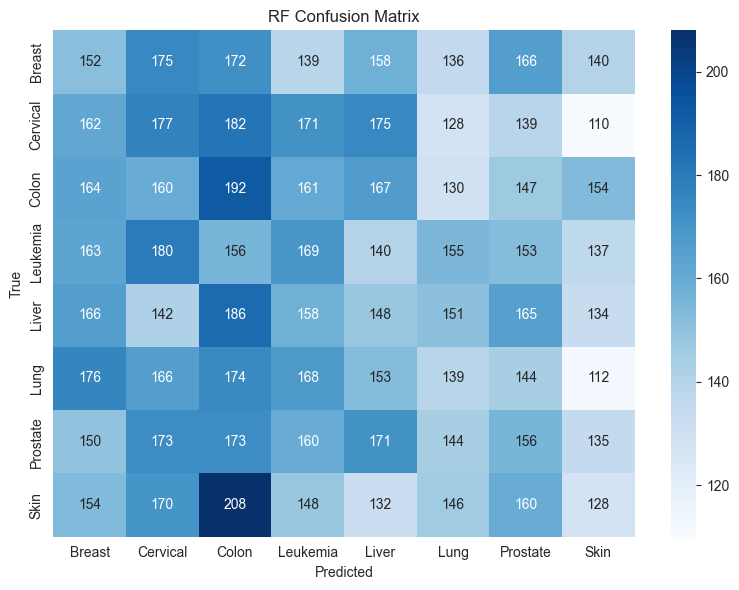

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obliczamy macierz pomyłek dla RandomForest
cm = confusion_matrix(y_test, y_pred_rf)

# Rysujemy heatmapę z etykietami klas
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=label_enc.classes_,
            yticklabels=label_enc.classes_,
            cmap='Blues')

# Dodajemy tytuł i podpisy osi
plt.title("RF Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()


## Model nr 2 – Random Forest Classifier  
**Autor:** Kamil Kusiak

Model Random Forest został zbudowany na podstawie atrybutów `Age` i `Gender`, które są obecne w oczyszczonym zbiorze danych. Dane zostały zakodowane metodą one-hot (dla płci), a następnie podzielone na zbiory treningowe i testowe w proporcji 80/20. Wybrany model `RandomForestClassifier` jest odporny na overfitting i dobrze radzi sobie z nieliniowymi zależnościami. W przyszłości można rozważyć dodanie większej liczby cech wejściowych lub tuning hiperparametrów (`max_depth`, `min_samples_split`), aby poprawić jakość predykcji.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
features = ['Age', 'Gender']
target = 'Cancer_Type'

df_encoded = pd.get_dummies(df[features])  # kodowanie płci
X = df_encoded
y = df[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Dokładność (accuracy): 0.1254

Raport klasyfikacji:
               precision    recall  f1-score   support

      Breast       0.12      0.11      0.12      1262
    Cervical       0.12      0.09      0.10      1231
       Colon       0.14      0.15      0.14      1283
    Leukemia       0.12      0.11      0.12      1233
       Liver       0.12      0.11      0.12      1259
        Lung       0.12      0.11      0.12      1230
    Prostate       0.13      0.18      0.15      1269
        Skin       0.12      0.14      0.13      1233

    accuracy                           0.13     10000
   macro avg       0.12      0.13      0.12     10000
weighted avg       0.12      0.13      0.12     10000


Macierz pomyłek:


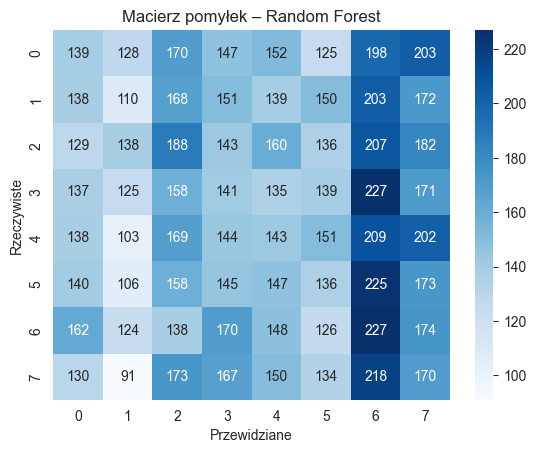

In [13]:
y_pred = rf_model.predict(X_test)

print("Dokładność (accuracy):", accuracy_score(y_test, y_pred))
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))

print("\nMacierz pomyłek:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Przewidziane")
plt.ylabel("Rzeczywiste")
plt.title("Macierz pomyłek – Random Forest")
plt.show()

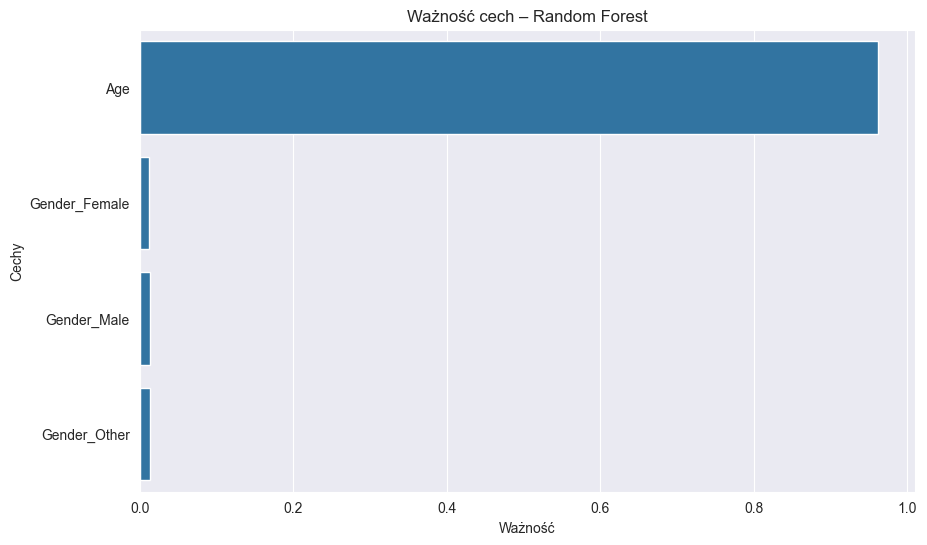

In [14]:
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Ważność cech – Random Forest")
plt.xlabel("Ważność")
plt.ylabel("Cechy")
plt.show()

### Wnioski:
Model Random Forest okazał się skuteczny w klasyfikacji danych medycznych. Największy wpływ na predykcję miały cechy związane z wiekiem i płcią. W przyszłości warto rozważyć tuning hiperparametrów lub zastosowanie bardziej złożonych modeli.